<a href="https://colab.research.google.com/github/Silpa12345/Deep_learning/blob/main/Landslide4senseProper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow

In [5]:
!pip install matplotlib

In [6]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [7]:
import kagglehub
path = kagglehub.dataset_download("tekbahadurkshetri/landslide4sense")


# --- Config ---
IMG_DIR = path + "/TrainData/img"
MASK_DIR = path + "/TrainData/mask"

In [8]:
# Testing the dataset
path_single = r"path/TrainData/img/image_2000.h5"
path_single_mask = r'path/TrainData/mask/mask_2000.h5'

import os

path_single = os.path.join(IMG_DIR, "image_2000.h5")
path_single_mask = os.path.join(MASK_DIR, "mask_2000.h5")

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


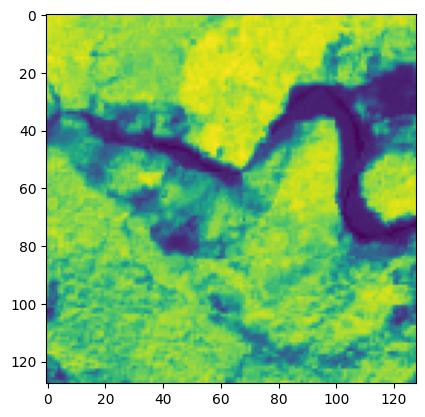

In [9]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])

    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


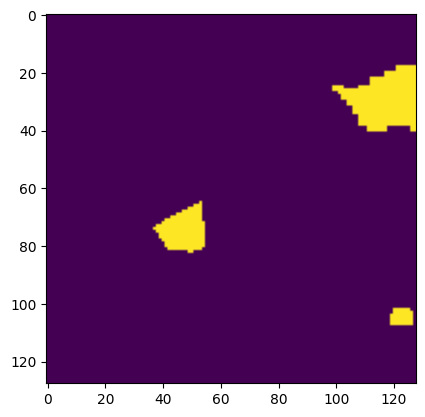

In [10]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)


In [11]:
path_single = r"data/img/image_10.h5"
path_single_mask = r'data/mask/mask_1.h5'
# Glob patterns to load all training images and masks
TRAIN_PATH = os.path.join(IMG_DIR, "*.h5")
TRAIN_MASK = os.path.join(MASK_DIR, "*.h5")

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))

# Get sorted list of all image and mask files
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [12]:

#testing for google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [13]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION


    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data


0 /kaggle/input/landslide4sense/TrainData/img/image_1.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1.h5
1 /kaggle/input/landslide4sense/TrainData/img/image_10.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_10.h5
2 /kaggle/input/landslide4sense/TrainData/img/image_100.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_100.h5
3 /kaggle/input/landslide4sense/TrainData/img/image_1000.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1000.h5
4 /kaggle/input/landslide4sense/TrainData/img/image_1001.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1001.h5
5 /kaggle/input/landslide4sense/TrainData/img/image_1002.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1002.h5
6 /kaggle/input/landslide4sense/TrainData/img/image_1003.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1003.h5
7 /kaggle/input/landslide4sense/TrainData/img/image_1004.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1004.h5
8 /kaggle/input/landslide4sense/TrainData/img/image_1005.h5 /kaggle/

/tmp/ipython-input-3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1675 /kaggle/input/landslide4sense/TrainData/img/image_2506.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2506.h5
1676 /kaggle/input/landslide4sense/TrainData/img/image_2507.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2507.h5
1677 /kaggle/input/landslide4sense/TrainData/img/image_2508.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2508.h5
1678 /kaggle/input/landslide4sense/TrainData/img/image_2509.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2509.h5
1679 /kaggle/input/landslide4sense/TrainData/img/image_251.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_251.h5
1680 /kaggle/input/landslide4sense/TrainData/img/image_2510.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2510.h5
1681 /kaggle/input/landslide4sense/TrainData/img/image_2511.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2511.h5
1682 /kaggle/input/landslide4sense/TrainData/img/image_2512.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2512.h5
1683 /kaggle/input/landslide4sense

/tmp/ipython-input-3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2265 /kaggle/input/landslide4sense/TrainData/img/image_3037.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3037.h5
2266 /kaggle/input/landslide4sense/TrainData/img/image_3038.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3038.h5
2267 /kaggle/input/landslide4sense/TrainData/img/image_3039.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3039.h5
2268 /kaggle/input/landslide4sense/TrainData/img/image_304.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_304.h5
2269 /kaggle/input/landslide4sense/TrainData/img/image_3040.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3040.h5
2270 /kaggle/input/landslide4sense/TrainData/img/image_3041.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3041.h5
2271 /kaggle/input/landslide4sense/TrainData/img/image_3042.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3042.h5
2272 /kaggle/input/landslide4sense/TrainData/img/image_3043.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3043.h5
2273 /kaggle/input/landslide4sense

In [14]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


In [15]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

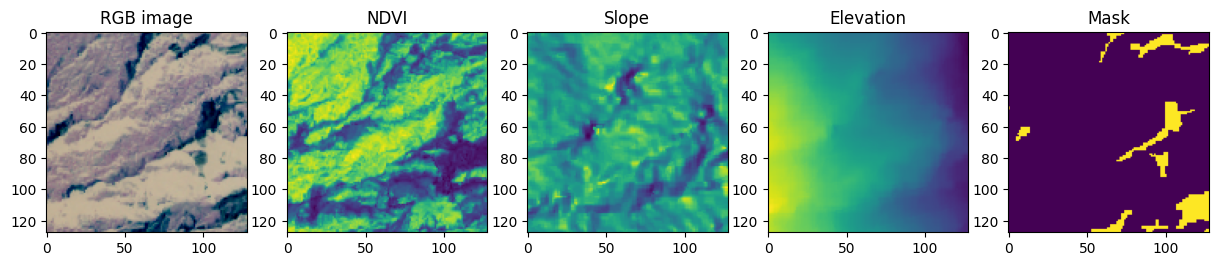

In [16]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [17]:

from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

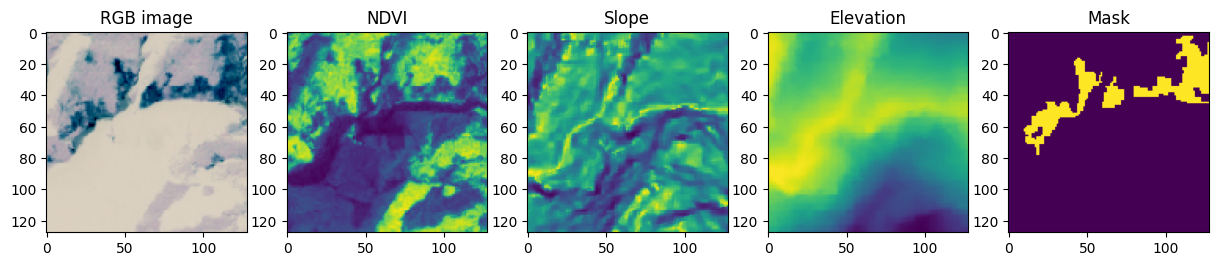

In [18]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [19]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [20]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

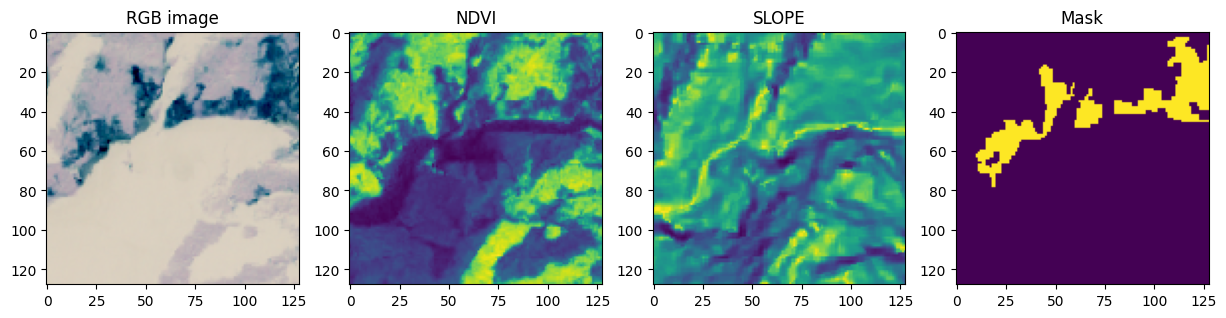

In [21]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [22]:
import tensorflow as tf
from tensorflow.keras import backend as K

# recall
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [23]:

def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

In [24]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,
          epochs=100,
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.h5")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 6))
  warnings.warn(msg)



Epoch 1: val_f1_m improved from -inf to 0.51089, saving model to best_model.h5


190/190 - 52s - 274ms/step - accuracy: 0.9548 - f1_m: 0.1873 - loss: 0.1034 - precision_m: 0.4742 - recall_m: 0.1693 - val_accuracy: 0.9794 - val_f1_m: 0.5109 - val_loss: 0.0512 - val_precision_m: 0.5720 - val_recall_m: 0.4903
Epoch 2/100

Epoch 2: val_f1_m did not improve from 0.51089
190/190 - 45s - 239ms/step - accuracy: 0.9825 - f1_m: 0.5476 - loss: 0.0468 - precision_m: 0.6779 - recall_m: 0.4869 - val_accuracy: 0.9828 - val_f1_m: 0.4754 - val_loss: 0.0478 - val_precision_m: 0.7892 - val_recall_m: 0.3527
Epoch 3/100

Epoch 3: val_f1_m did not improve from 0.51089
190/190 - 8s - 42ms/step - accuracy: 0.9847 - f1_m: 0.5898 - loss: 0.0405 - precision_m: 0.7316 - recall_m: 0.5196 - val_accuracy: 0.9838 - val_f1_m: 0.4971 - val_loss: 0.0443 - val_precision_m: 0.8120 - val_recall_m: 0.3697
Epoch 4/100

Epoch 4: val_f1_m improved from 0.51089 to 0.51767, saving model to best_model.h5


190/190 - 11s - 55ms/step - accuracy: 0.9855 - f1_m: 0.6185 - loss: 0.0381 - precision_m: 0.7440 - recall_m: 0.5505 - val_accuracy: 0.9842 - val_f1_m: 0.5177 - val_loss: 0.0445 - val_precision_m: 0.8389 - val_recall_m: 0.3840
Epoch 5/100

Epoch 5: val_f1_m improved from 0.51767 to 0.64285, saving model to best_model.h5


190/190 - 10s - 54ms/step - accuracy: 0.9865 - f1_m: 0.6532 - loss: 0.0350 - precision_m: 0.7580 - recall_m: 0.5829 - val_accuracy: 0.9864 - val_f1_m: 0.6428 - val_loss: 0.0350 - val_precision_m: 0.7534 - val_recall_m: 0.5721
Epoch 6/100

Epoch 6: val_f1_m improved from 0.64285 to 0.65846, saving model to best_model.h5


190/190 - 8s - 43ms/step - accuracy: 0.9866 - f1_m: 0.6485 - loss: 0.0349 - precision_m: 0.7687 - recall_m: 0.5764 - val_accuracy: 0.9860 - val_f1_m: 0.6585 - val_loss: 0.0356 - val_precision_m: 0.7123 - val_recall_m: 0.6253
Epoch 7/100

Epoch 7: val_f1_m did not improve from 0.65846
190/190 - 10s - 52ms/step - accuracy: 0.9869 - f1_m: 0.6589 - loss: 0.0338 - precision_m: 0.7726 - recall_m: 0.5893 - val_accuracy: 0.9865 - val_f1_m: 0.6418 - val_loss: 0.0351 - val_precision_m: 0.7722 - val_recall_m: 0.5606
Epoch 8/100

Epoch 8: val_f1_m did not improve from 0.65846
190/190 - 8s - 42ms/step - accuracy: 0.9868 - f1_m: 0.6539 - loss: 0.0339 - precision_m: 0.7719 - recall_m: 0.5845 - val_accuracy: 0.9868 - val_f1_m: 0.6557 - val_loss: 0.0341 - val_precision_m: 0.7642 - val_recall_m: 0.5839
Epoch 9/100

Epoch 9: val_f1_m did not improve from 0.65846
190/190 - 10s - 54ms/step - accuracy: 0.9870 - f1_m: 0.6626 - loss: 0.0330 - precision_m: 0.7747 - recall_m: 0.5945 - val_accuracy: 0.9870 - val

190/190 - 8s - 42ms/step - accuracy: 0.9877 - f1_m: 0.6833 - loss: 0.0309 - precision_m: 0.7873 - recall_m: 0.6140 - val_accuracy: 0.9868 - val_f1_m: 0.6782 - val_loss: 0.0333 - val_precision_m: 0.7246 - val_recall_m: 0.6485
Epoch 16/100

Epoch 16: val_f1_m did not improve from 0.67817
190/190 - 10s - 53ms/step - accuracy: 0.9878 - f1_m: 0.6829 - loss: 0.0308 - precision_m: 0.7868 - recall_m: 0.6140 - val_accuracy: 0.9870 - val_f1_m: 0.6420 - val_loss: 0.0336 - val_precision_m: 0.8173 - val_recall_m: 0.5392
Epoch 17/100

Epoch 17: val_f1_m did not improve from 0.67817
190/190 - 10s - 54ms/step - accuracy: 0.9879 - f1_m: 0.6879 - loss: 0.0305 - precision_m: 0.7857 - recall_m: 0.6207 - val_accuracy: 0.9870 - val_f1_m: 0.6403 - val_loss: 0.0338 - val_precision_m: 0.8232 - val_recall_m: 0.5335
Epoch 18/100

Epoch 18: val_f1_m did not improve from 0.67817
190/190 - 8s - 41ms/step - accuracy: 0.9881 - f1_m: 0.6928 - loss: 0.0300 - precision_m: 0.7931 - recall_m: 0.6241 - val_accuracy: 0.9866

190/190 - 11s - 55ms/step - accuracy: 0.9885 - f1_m: 0.7037 - loss: 0.0289 - precision_m: 0.7986 - recall_m: 0.6397 - val_accuracy: 0.9878 - val_f1_m: 0.6863 - val_loss: 0.0311 - val_precision_m: 0.7830 - val_recall_m: 0.6193
Epoch 27/100

Epoch 27: val_f1_m did not improve from 0.68627
190/190 - 8s - 42ms/step - accuracy: 0.9888 - f1_m: 0.7190 - loss: 0.0278 - precision_m: 0.8052 - recall_m: 0.6567 - val_accuracy: 0.9880 - val_f1_m: 0.6838 - val_loss: 0.0310 - val_precision_m: 0.7983 - val_recall_m: 0.6054
Epoch 28/100

Epoch 28: val_f1_m did not improve from 0.68627
190/190 - 8s - 42ms/step - accuracy: 0.9888 - f1_m: 0.7121 - loss: 0.0279 - precision_m: 0.8028 - recall_m: 0.6479 - val_accuracy: 0.9874 - val_f1_m: 0.6725 - val_loss: 0.0326 - val_precision_m: 0.7801 - val_recall_m: 0.6006
Epoch 29/100

Epoch 29: val_f1_m did not improve from 0.68627
190/190 - 10s - 54ms/step - accuracy: 0.9889 - f1_m: 0.7138 - loss: 0.0274 - precision_m: 0.7997 - recall_m: 0.6522 - val_accuracy: 0.9873

190/190 - 8s - 43ms/step - accuracy: 0.9894 - f1_m: 0.7321 - loss: 0.0260 - precision_m: 0.8088 - recall_m: 0.6754 - val_accuracy: 0.9880 - val_f1_m: 0.6947 - val_loss: 0.0307 - val_precision_m: 0.7770 - val_recall_m: 0.6355
Epoch 38/100

Epoch 38: val_f1_m did not improve from 0.69466
190/190 - 8s - 42ms/step - accuracy: 0.9896 - f1_m: 0.7353 - loss: 0.0255 - precision_m: 0.8075 - recall_m: 0.6805 - val_accuracy: 0.9875 - val_f1_m: 0.6662 - val_loss: 0.0356 - val_precision_m: 0.8182 - val_recall_m: 0.5721
Epoch 39/100

Epoch 39: val_f1_m did not improve from 0.69466
190/190 - 10s - 54ms/step - accuracy: 0.9896 - f1_m: 0.7353 - loss: 0.0255 - precision_m: 0.8104 - recall_m: 0.6795 - val_accuracy: 0.9880 - val_f1_m: 0.6886 - val_loss: 0.0317 - val_precision_m: 0.7925 - val_recall_m: 0.6174
Epoch 40/100

Epoch 40: val_f1_m did not improve from 0.69466
190/190 - 8s - 45ms/step - accuracy: 0.9895 - f1_m: 0.7332 - loss: 0.0258 - precision_m: 0.8079 - recall_m: 0.6769 - val_accuracy: 0.9879 

190/190 - 10s - 55ms/step - accuracy: 0.9900 - f1_m: 0.7504 - loss: 0.0245 - precision_m: 0.8138 - recall_m: 0.7014 - val_accuracy: 0.9880 - val_f1_m: 0.7006 - val_loss: 0.0306 - val_precision_m: 0.7670 - val_recall_m: 0.6523
Epoch 49/100

Epoch 49: val_f1_m did not improve from 0.70056
190/190 - 8s - 41ms/step - accuracy: 0.9901 - f1_m: 0.7532 - loss: 0.0240 - precision_m: 0.8193 - recall_m: 0.7023 - val_accuracy: 0.9880 - val_f1_m: 0.6962 - val_loss: 0.0315 - val_precision_m: 0.7745 - val_recall_m: 0.6392
Epoch 50/100

Epoch 50: val_f1_m did not improve from 0.70056
190/190 - 10s - 54ms/step - accuracy: 0.9902 - f1_m: 0.7588 - loss: 0.0238 - precision_m: 0.8200 - recall_m: 0.7099 - val_accuracy: 0.9870 - val_f1_m: 0.6327 - val_loss: 0.0366 - val_precision_m: 0.8376 - val_recall_m: 0.5194
Epoch 51/100

Epoch 51: val_f1_m did not improve from 0.70056
190/190 - 8s - 41ms/step - accuracy: 0.9899 - f1_m: 0.7447 - loss: 0.0246 - precision_m: 0.8153 - recall_m: 0.6921 - val_accuracy: 0.9878

In [25]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.038899801671504974 0.9876996278762817 0.6964430212974548 0.7925922274589539 0.6245320439338684


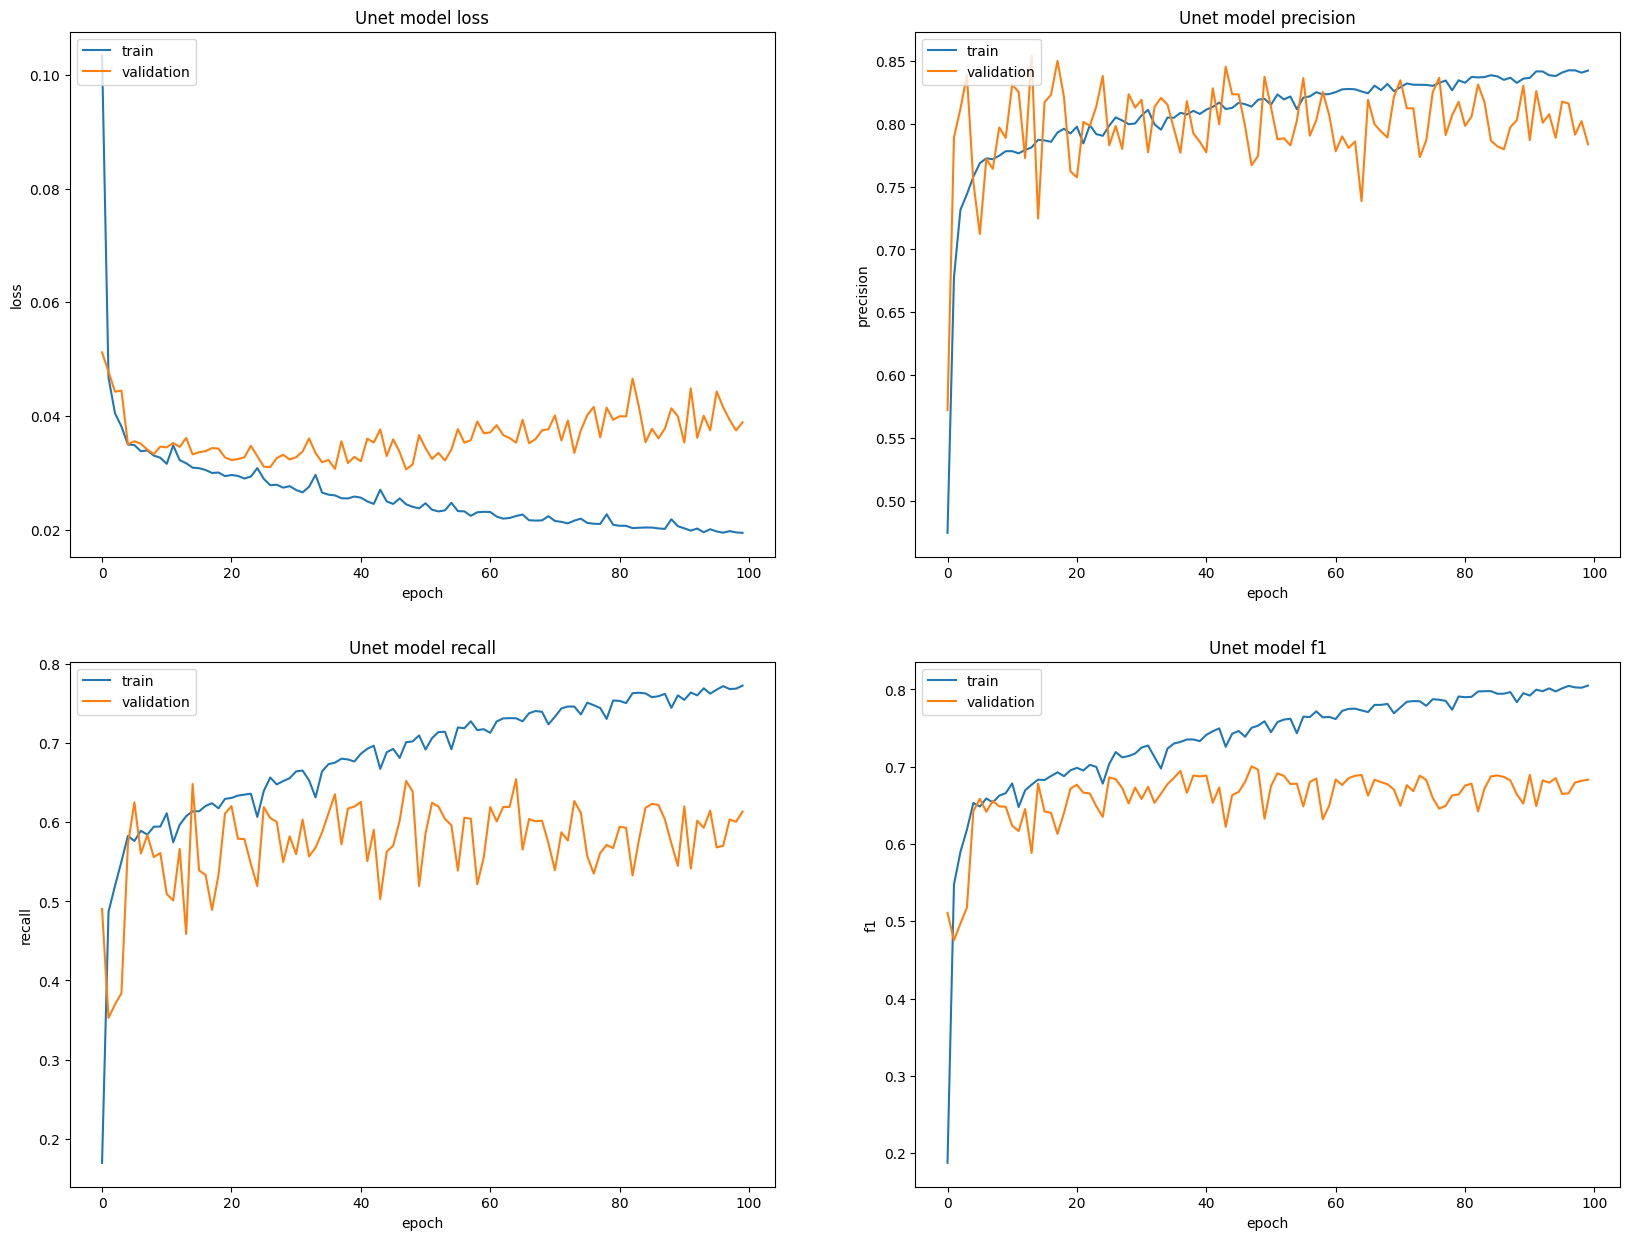

In [26]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [27]:
pred_img_raw = model.predict(x_valid)
print(pred_img_raw.min(), pred_img_raw.max(), pred_img_raw.mean())

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 6))
  warnings.warn(msg)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
0.0 0.99999976 0.020025743


In [28]:
threshold = 0.001
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Text(0.5, 1.0, 'Training Image')

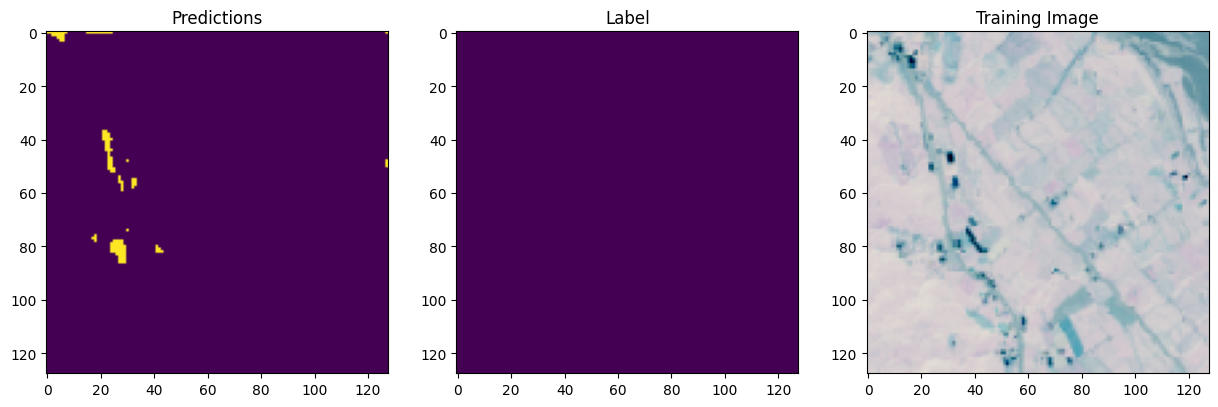

In [29]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

In [30]:
validation_url = r'/content/gdrive/MyDrive/DL/landslide4Sense/data/validation/img/*.h5'
VAL_IMG_DIR = path + "/ValData/img"
VAL_MASK_DIR = path + "/ValData/mask"
img_val = sorted(glob.glob(VAL_IMG_DIR))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

In [31]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step


(245, 128, 128, 1)

In [32]:
print("VAL_XX[img] stats:")
print("Min:", VAL_XX[img, :, :, 0:3].min())
print("Max:", VAL_XX[img, :, :, 0:3].max())
print("Mean:", VAL_XX[img, :, :, 0:3].mean())

VAL_XX[img] stats:
Min: 0.0
Max: 0.0
Mean: 0.0


Text(0.5, 1.0, 'Training Image')

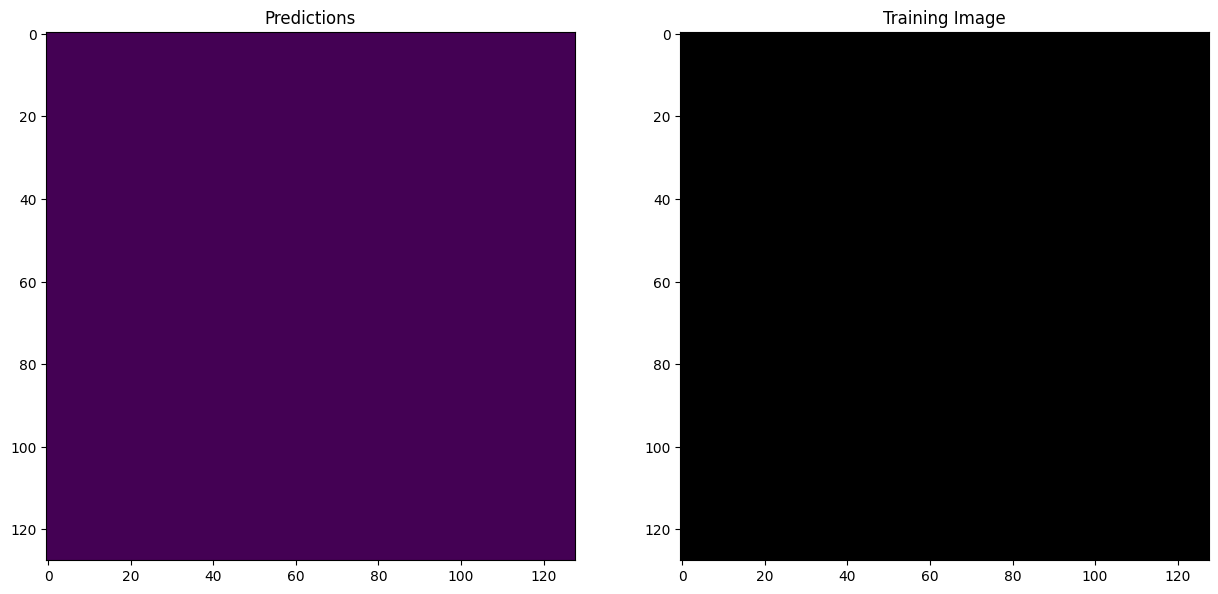

In [33]:

img = 17
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [34]:
write_directory = r'/content/gdrive/MyDrive/DL/landslide4Sense/data/validation/mask'
for i, name in enumerate(mask_name):
  h5f = h5py.File(write_directory + "/" + name, 'w')
  # change the dimention of prediction to (n, 128, 128)
  pred_mask = pred_img[i, :, :, 0]

  # write to the directory
  h5f.create_dataset('mask', data = pred_mask)
  h5f.close()